In [18]:
import pandas as pd

pd.set_option('display.max_columns', None)

df = pd.read_csv('bank-additional.csv', sep=',', na_values=['unknown'])

excel_path = 'customer-details.xlsx'
xls = pd.ExcelFile(excel_path)
print(xls.sheet_names)

df_2012 = pd.read_excel(xls, sheet_name='2012')
df_2013 = pd.read_excel(xls, sheet_name='2013')
df_2014 = pd.read_excel(xls, sheet_name='2014')
df_customers = pd.concat([df_2012, df_2013, df_2014], ignore_index=True)
df_customers.to_csv('customer-details.csv', index=False)

['2012', '2013', '2014']


In [19]:
num_cols = ['age', 'duration', 'campaign', 'pdays', 'previous',
            'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'nr.employed']

for col in num_cols:
    df[col] = df[col].astype(str).str.replace(',', '.').str.replace(' ', '')
    df[col] = pd.to_numeric(df[col], errors='coerce')


In [20]:
df.tail()

,Unnamed: 0,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,date,latitude,longitude,id_
42995,19154,NaN,admin.,MARRIED,university.degree,0.0,0.0,0.0,cellular,618,2,999,0,NONEXISTENT,1.4,93.444,-36.1,NaN,5228.1,yes,13-octubre-2015,38.147,-105.582,4eed05de-2a98-4227-b488-32122009b638
42996,26206,34.0,technician,MARRIED,professional.course,0.0,1.0,1.0,cellular,42,7,999,0,NONEXISTENT,-0.1,93.200,-42.0,NaN,5195.8,no,17-marzo-2018,49.235,-112.201,0f0aca88-4088-4fe2-905f-44fb675d9493
42997,15046,NaN,blue-collar,SINGLE,basic.6y,0.0,1.0,0.0,cellular,391,2,999,0,NONEXISTENT,1.4,93.918,-42.7,NaN,5228.1,no,15-septiembre-2016,40.679,-120.015,cadadd4b-7ee5-4019-b13a-ca01bb67ca5b
42998,15280,NaN,admin.,MARRIED,university.degree,NaN,0.0,0.0,cellular,674,3,999,0,NONEXISTENT,1.4,93.918,-42.7,"4,958",5228.1,no,23-septiembre-2019,27.772,-117.518,5f432048-d515-4bb5-9c94-62db451f88d4
42999,27570,NaN,unemployed,SINGLE,university.degree,0.0,0.0,1.0,cellular,104,2,999,0,NONEXISTENT,-0.1,93.200,-42.0,"4,021",5195.8,no,6-noviembre-2019,41.146,-105.026,993bbbd6-4dbc-4a40-a408-f91f8462bee6


In [21]:
df.columns

Index(['Unnamed: 0', 'age', 'job', 'marital', 'education', 'default',
       'housing', 'loan', 'contact', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'date', 'latitude',
       'longitude', 'id_'],
      dtype='object')

In [22]:
df.shape

(43000, 24)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43000 entries, 0 to 42999
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      43000 non-null  int64  
 1   age             37880 non-null  float64
 2   job             42655 non-null  object 
 3   marital         42915 non-null  object 
 4   education       41193 non-null  object 
 5   default         34019 non-null  float64
 6   housing         41974 non-null  float64
 7   loan            41974 non-null  float64
 8   contact         43000 non-null  object 
 9   duration        43000 non-null  int64  
 10  campaign        43000 non-null  int64  
 11  pdays           43000 non-null  int64  
 12  previous        43000 non-null  int64  
 13  poutcome        43000 non-null  object 
 14  emp.var.rate    43000 non-null  float64
 15  cons.price.idx  42529 non-null  float64
 16  cons.conf.idx   43000 non-null  float64
 17  euribor3m       33744 non-null 

## Duplicados

In [24]:
df['id_'].duplicated().sum()

np.int64(0)

In [25]:
df.drop(columns='id_').duplicated().sum()

np.int64(0)

In [26]:
df['id_'] = df['id_'].str.replace('-', '').str.upper()

In [27]:
df = df.drop(columns='id_')

## Guardar datos tras Transformación

In [28]:
df.to_csv('bank-additional-limpio.csv', index=False)

df_customers.to_csv('customer-details-limpio.csv', index=False)

## Análisis estadístico

In [29]:
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,43000.0,20651.10,11868.77,0.0,10381.75,20642.50,30930.25,41187.00
age,37880.0,39.98,10.44,17.0,32.00,38.00,47.00,98.00
default,34019.0,0.00,0.01,0.0,0.00,0.00,0.00,1.00
housing,41974.0,0.54,0.50,0.0,0.00,1.00,1.00,1.00
loan,41974.0,0.16,0.36,0.0,0.00,0.00,0.00,1.00
duration,43000.0,257.74,258.67,0.0,102.00,179.00,319.00,4918.00
campaign,43000.0,2.57,2.77,1.0,1.00,2.00,3.00,56.00
pdays,43000.0,962.33,187.26,0.0,999.00,999.00,999.00,999.00
previous,43000.0,0.17,0.50,0.0,0.00,0.00,0.00,7.00
emp.var.rate,43000.0,0.08,1.57,-3.4,-1.80,1.10,1.40,1.40


In [30]:
df.describe(include='object').T.round(2)

,count,unique,top,freq
job,42655,11,admin.,10873
marital,42915,3,MARRIED,25999
education,41193,7,university.degree,12722
contact,43000,2,cellular,27396
poutcome,43000,3,NONEXISTENT,37103
euribor3m,33744,309,"4,857",2287
y,43000,2,no,38156
date,42752,1825,28-febrero-2018,95


In [31]:
df.groupby('education')['education'].count()

education
basic.4y                4356
basic.6y                2386
basic.9y                6309
high.school             9925
illiterate                18
professional.course     5477
university.degree      12722
Name: education, dtype: int64

In [32]:
df['education'].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', nan, 'university.degree', 'illiterate'],
      dtype=object)

In [33]:
df['job'].value_counts(dropna=False)

job
admin.           10873
blue-collar       9654
technician        7026
services          4162
management        3050
retired           1790
entrepreneur      1522
self-employed     1489
housemaid         1123
unemployed        1063
student            903
NaN                345
Name: count, dtype: int64

In [34]:
df['job'].value_counts()

job
admin.           10873
blue-collar       9654
technician        7026
services          4162
management        3050
retired           1790
entrepreneur      1522
self-employed     1489
housemaid         1123
unemployed        1063
student            903
Name: count, dtype: int64

## Columnas categóricas

In [35]:
col_cat = df.select_dtypes(include='object').columns

In [36]:
col_cat

Index(['job', 'marital', 'education', 'contact', 'poutcome', 'euribor3m', 'y',
       'date'],
      dtype='object')

### Value counts

In [37]:
for columna in col_cat:

    print(f'La columna {columna} que tiene {df[columna].nunique()} categorías')
    
    display(df[columna].value_counts(dropna=False))

La columna job que tiene 11 categorías


job
admin.           10873
blue-collar       9654
technician        7026
services          4162
management        3050
retired           1790
entrepreneur      1522
self-employed     1489
housemaid         1123
unemployed        1063
student            903
NaN                345
Name: count, dtype: int64

La columna marital que tiene 3 categorías


marital
MARRIED     25999
SINGLE      12105
DIVORCED     4811
NaN            85
Name: count, dtype: int64

La columna education que tiene 7 categorías


education
university.degree      12722
high.school             9925
basic.9y                6309
professional.course     5477
basic.4y                4356
basic.6y                2386
NaN                     1807
illiterate                18
Name: count, dtype: int64

La columna contact que tiene 2 categorías


contact
cellular     27396
telephone    15604
Name: count, dtype: int64

La columna poutcome que tiene 3 categorías


poutcome
NONEXISTENT    37103
FAILURE         4461
SUCCESS         1436
Name: count, dtype: int64

La columna euribor3m que tiene 309 categorías


euribor3m
NaN      9256
4,857    2287
4,962    2124
4,963    2019
4,961    1594
         ... 
5,045       1
4,921       1
0,956       1
0,894       1
0,953       1
Name: count, Length: 310, dtype: int64

La columna y que tiene 2 categorías


y
no     38156
yes     4844
Name: count, dtype: int64

La columna date que tiene 1825 categorías


date
NaN                  248
28-febrero-2018       95
28-febrero-2016       94
28-febrero-2015       92
28-febrero-2017       89
                    ... 
17-diciembre-2018     11
21-diciembre-2019     10
4-abril-2017          10
20-noviembre-2015     10
14-abril-2015         10
Name: count, Length: 1826, dtype: int64

### Visualizaciones (barras)

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [39]:
df['education'].value_counts().index

Index(['university.degree', 'high.school', 'basic.9y', 'professional.course',
       'basic.4y', 'basic.6y', 'illiterate'],
      dtype='object', name='education')

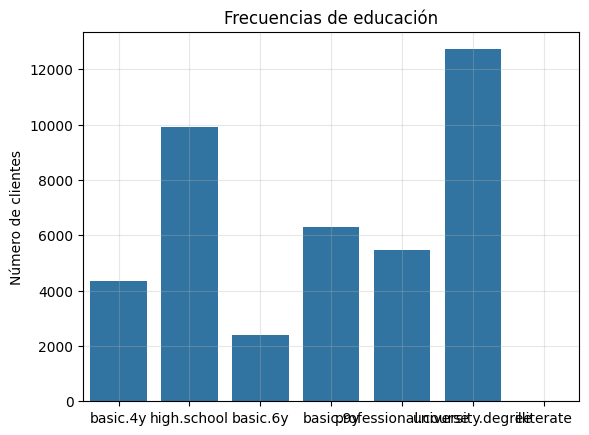

In [40]:
plt.figure()

sns.countplot(data=df, x='education')

plt.title('Frecuencias de educación')
plt.xlabel('')
plt.ylabel('Número de clientes')
plt.grid(alpha=0.3)

plt.show()

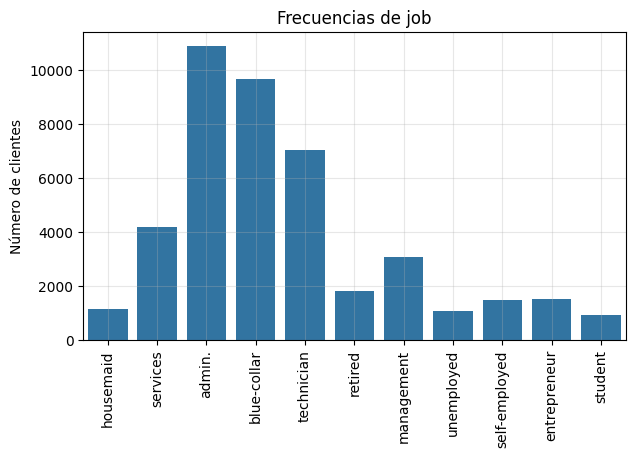

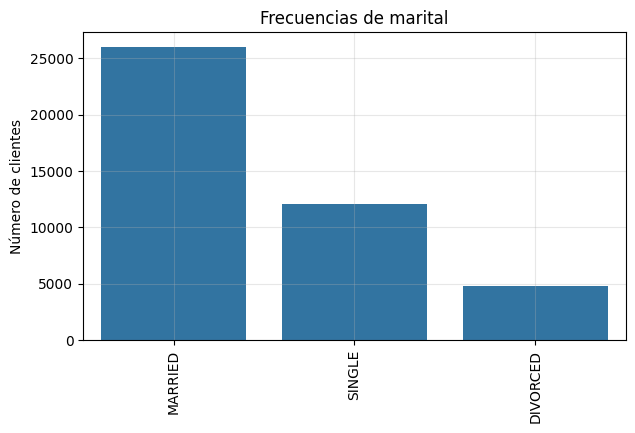

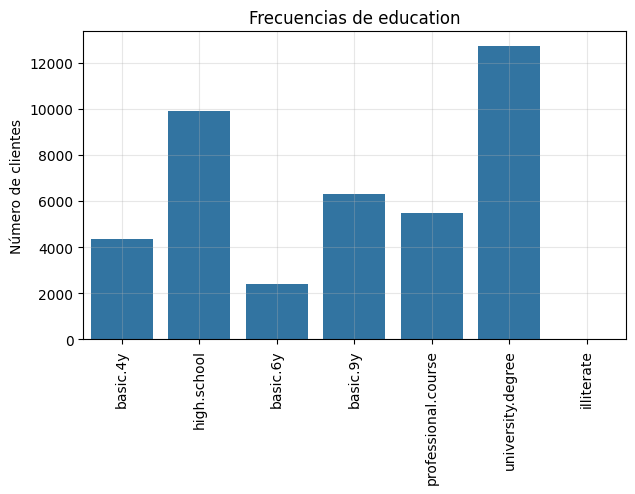

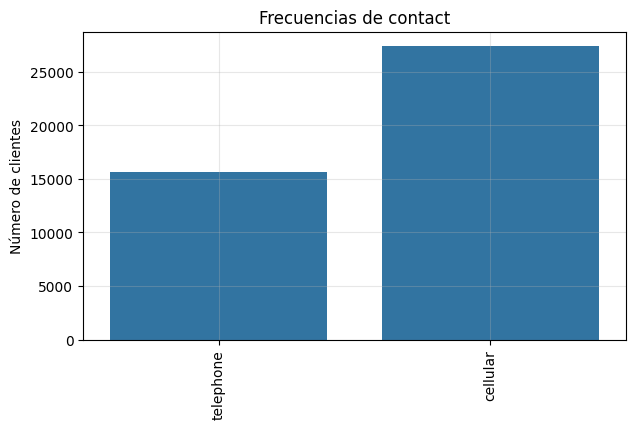

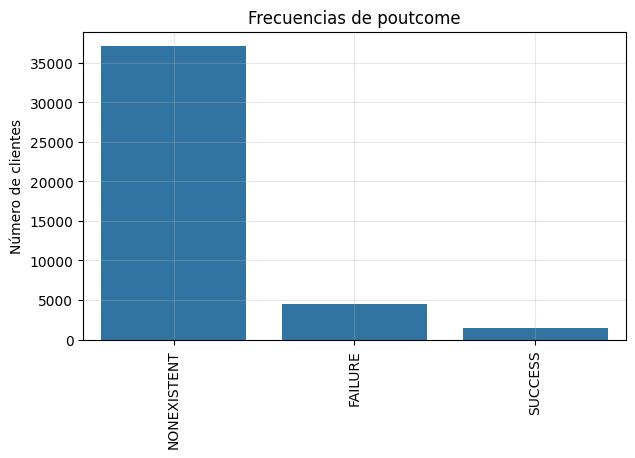

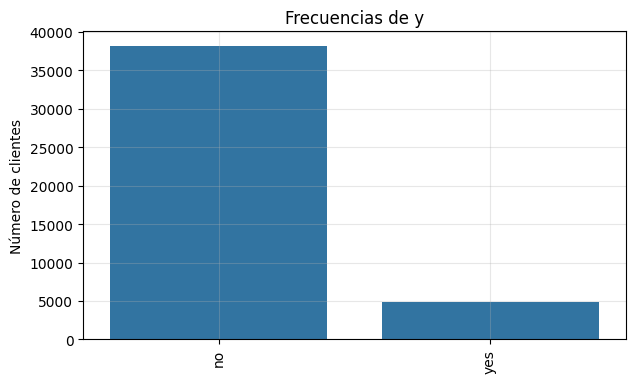

In [41]:
col_cat = [col for col in col_cat if col not in ['date', 'euribor3m']]

for columna in col_cat:
    n_categorias = df[columna].nunique()

    plt.figure(figsize=(max(7, min(n_categorias * 0.5, 25)), 4))

    sns.countplot(data=df, x=columna)

    plt.title(f'Frecuencias de {columna}')
    plt.xlabel('')
    plt.ylabel('Número de clientes')
    plt.grid(alpha=0.3)
    plt.xticks(rotation=90)

    plt.show()

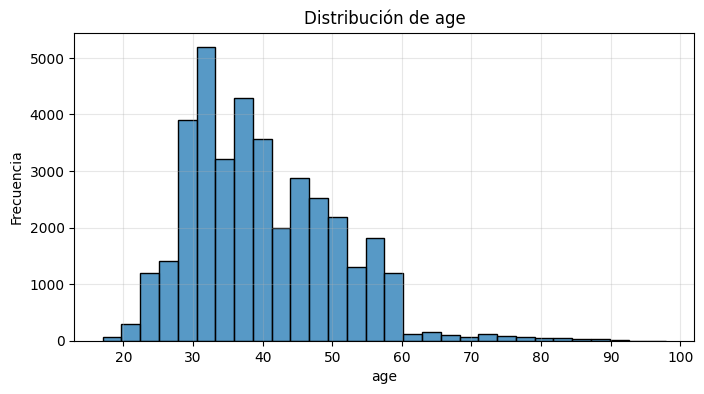

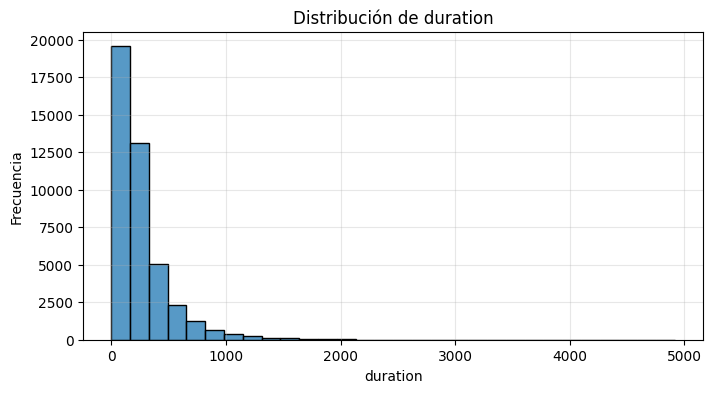

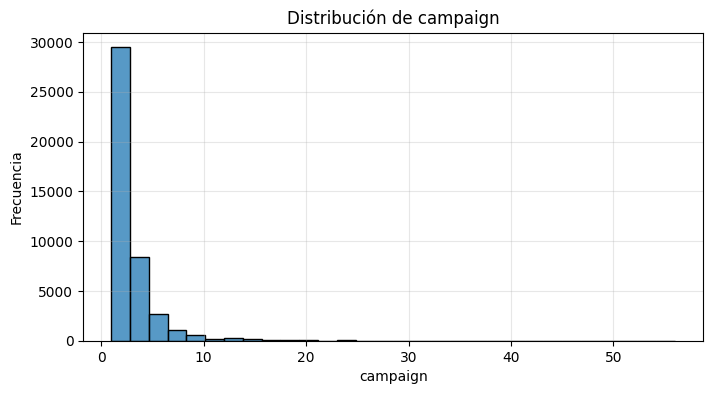

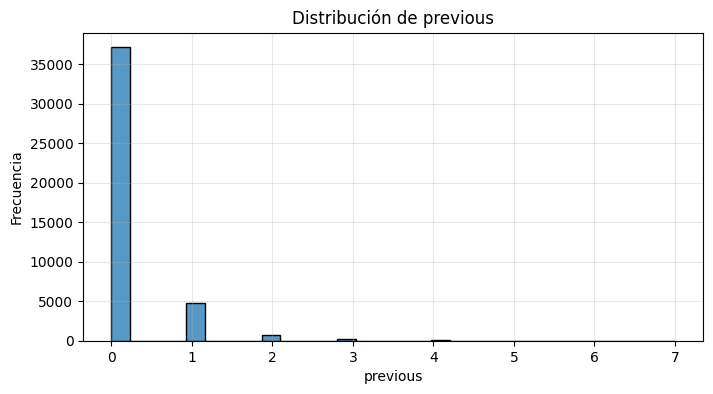

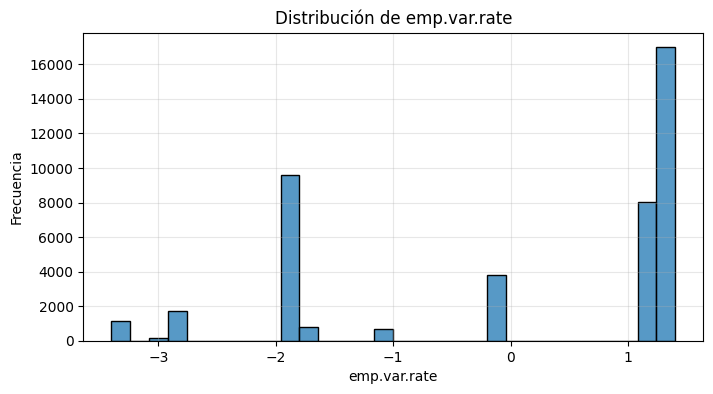

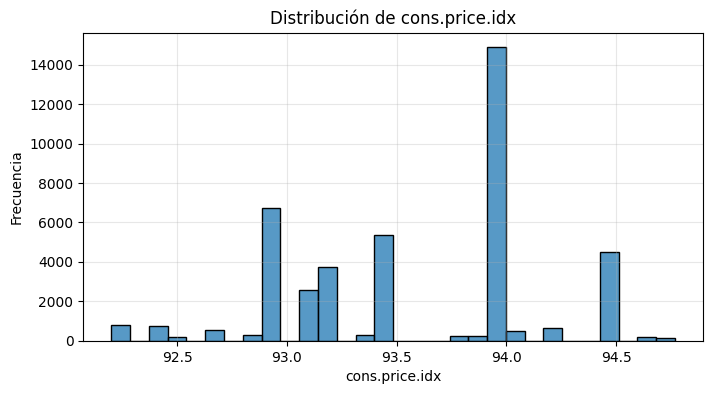

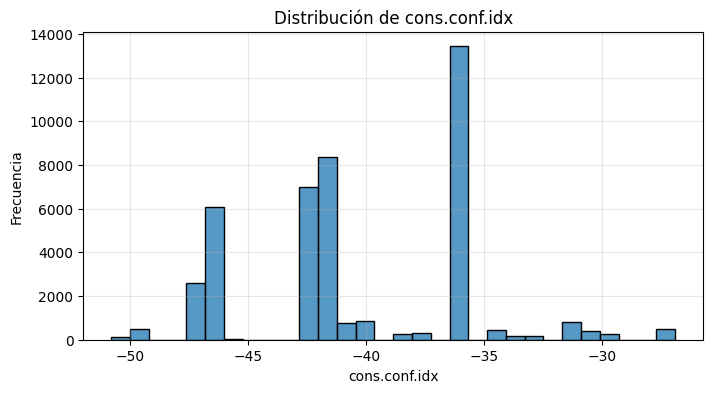

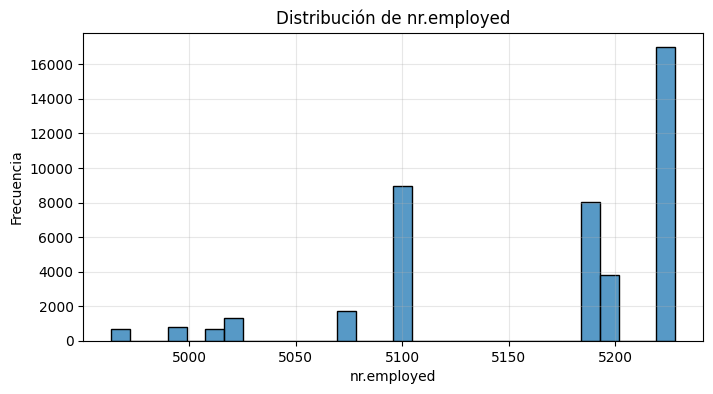

In [42]:
num_cols = ['age', 'duration', 'campaign', 'previous',
            'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'nr.employed']

for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], bins=30)  # sin kde
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.grid(alpha=0.3)
    plt.show()



## Matriz de correlación

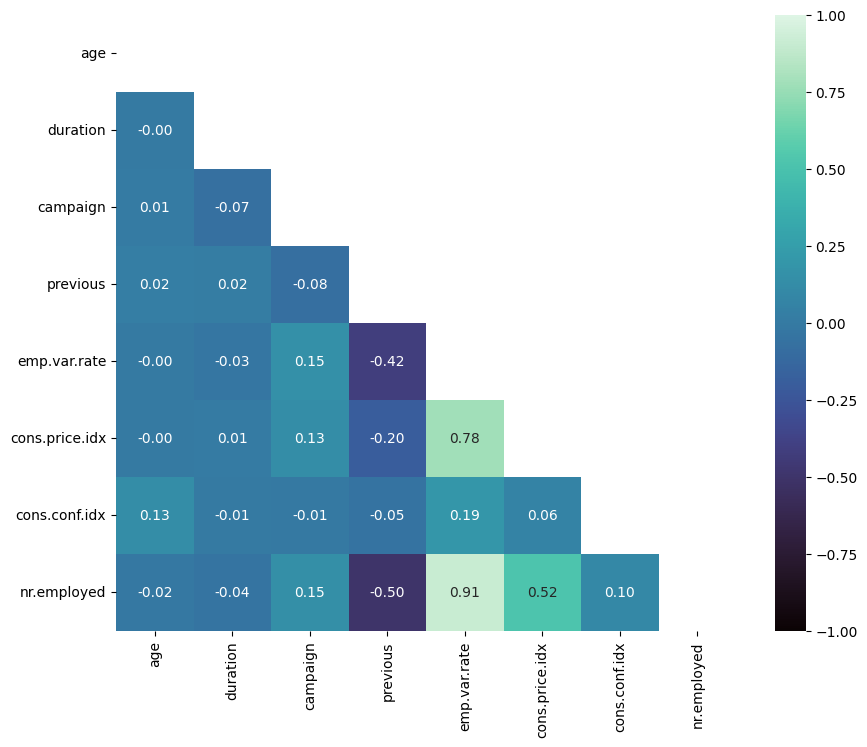

In [43]:
matriz_corr = df[num_cols].corr(numeric_only=True)

plt.figure(figsize=(10, 8))

mask = np.triu(np.ones_like(matriz_corr, dtype=bool))

sns.heatmap(matriz_corr, annot=True, vmax=1, vmin=-1, cmap='mako', mask=mask, fmt=".2f")
plt.show()

## Relaciones cruzadas

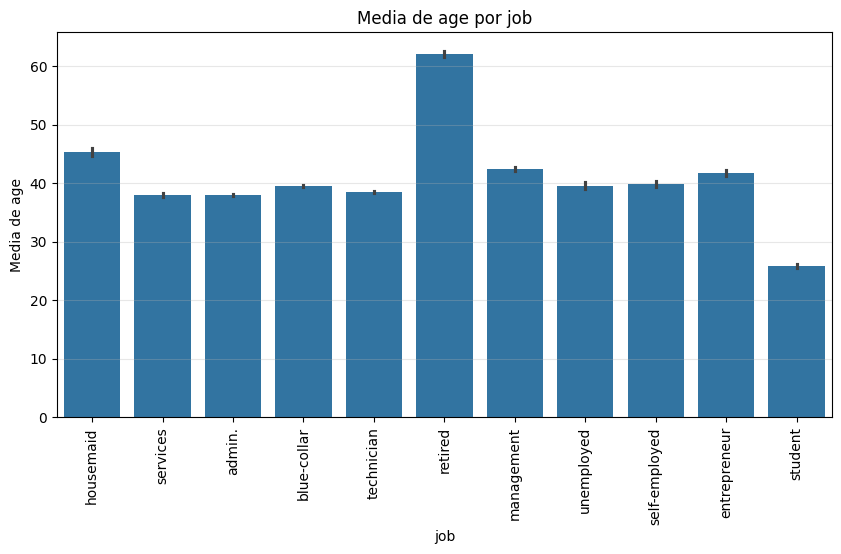

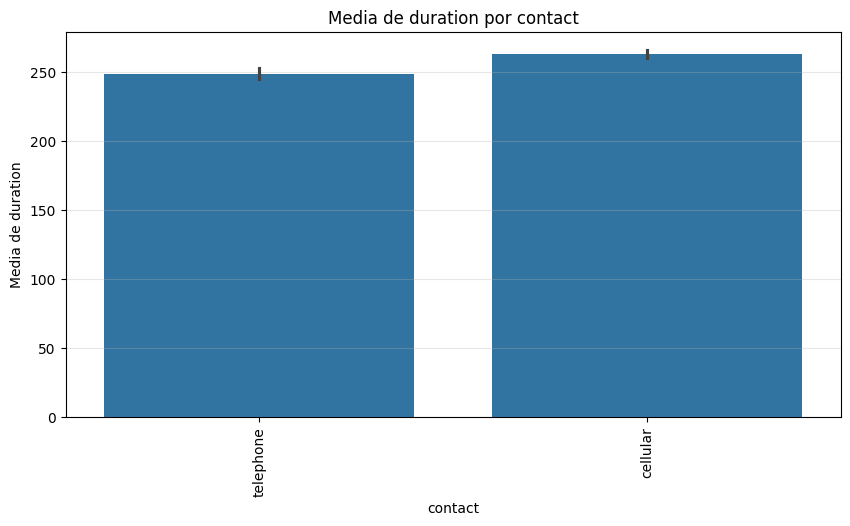

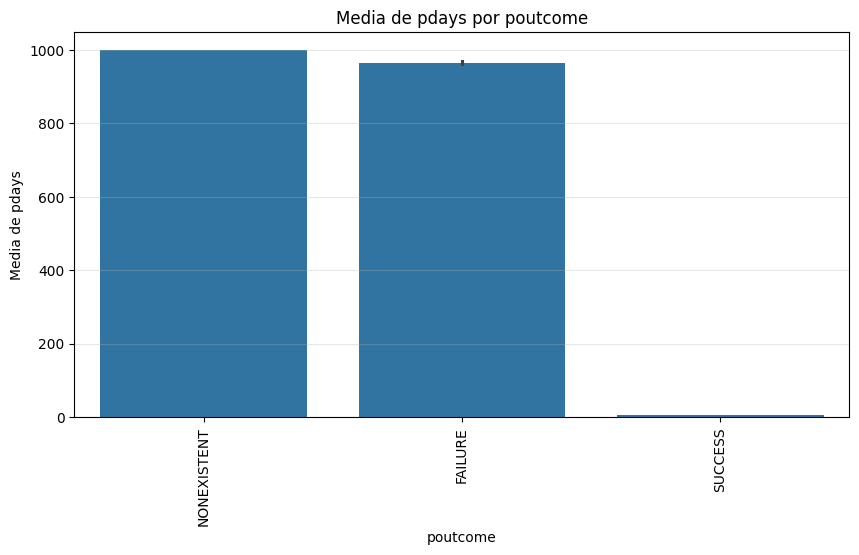

In [44]:
box_cols = [
    ('age', 'job'),
    ('duration', 'contact'),
    ('pdays', 'poutcome')
]
for num_var, cat_var in box_cols:
    plt.figure(figsize=(10, 5))
    sns.barplot(data=df, x=cat_var, y=num_var, estimator='mean', errorbar='ci')
    plt.title(f'Media de {num_var} por {cat_var}')
    plt.xlabel(cat_var)
    plt.ylabel(f'Media de {num_var}')
    plt.grid(axis='y', alpha=0.3)
    plt.xticks(rotation=90)
    plt.show()

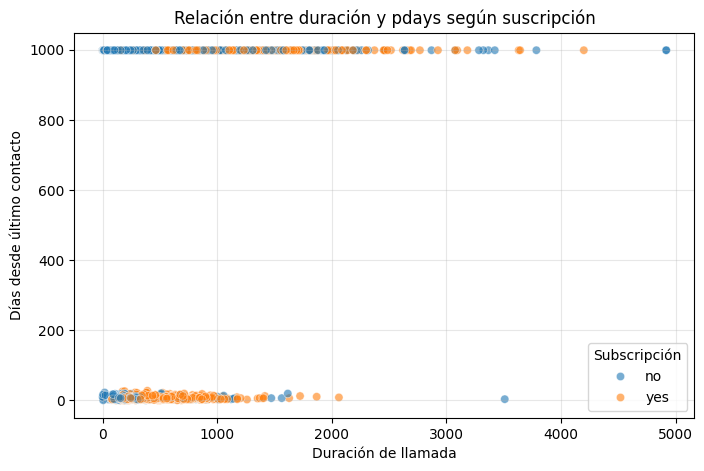

In [45]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='duration', y='pdays', hue='y', alpha=0.6)
plt.title('Relación entre duración y pdays según suscripción')
plt.xlabel('Duración de llamada')
plt.ylabel('Días desde último contacto')
plt.grid(alpha=0.3)
plt.legend(title='Subscripción')
plt.show()

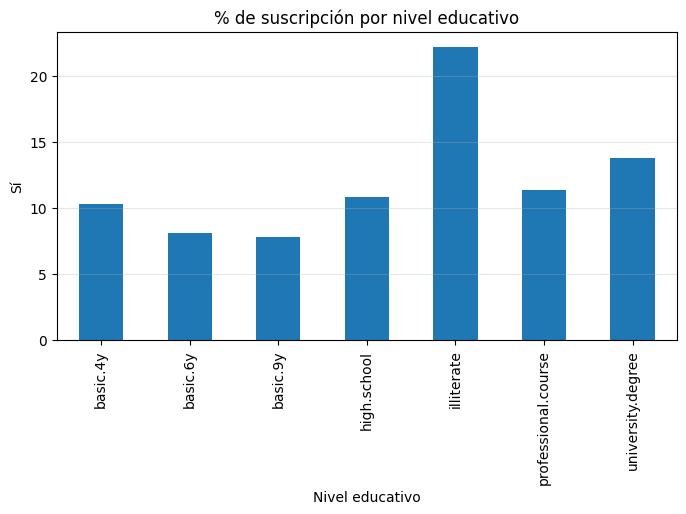

In [46]:
df_edu = df.groupby('education')['y'].value_counts(normalize=True).unstack()
df_edu['Sí'] = df_edu.get('yes', 0) * 100

df_edu['Sí'].plot(kind='bar', figsize=(8,4))
plt.title('% de suscripción por nivel educativo')
plt.ylabel('Sí')
plt.xlabel('Nivel educativo')
plt.grid(axis='y', alpha=0.3)
plt.show()

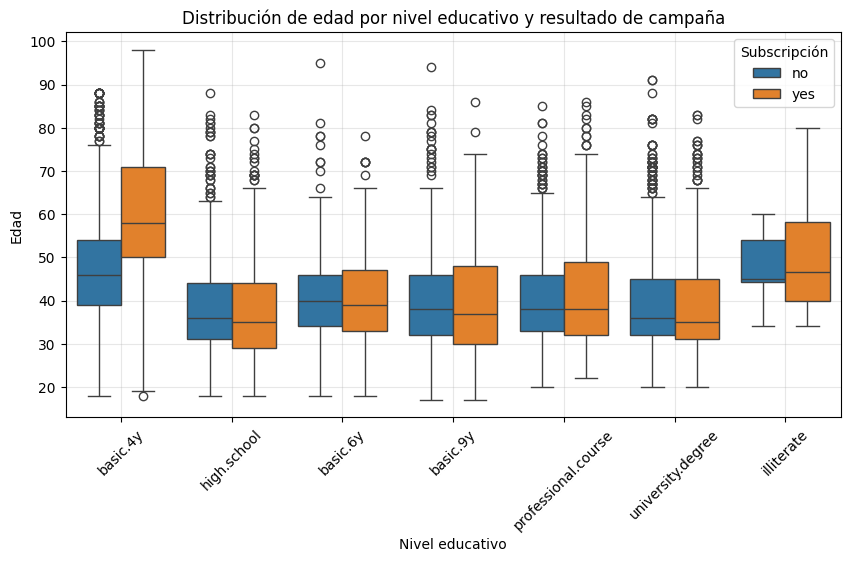

In [47]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='education', y='age', hue='y')
plt.title('Distribución de edad por nivel educativo y resultado de campaña')
plt.xlabel('Nivel educativo')
plt.ylabel('Edad')
plt.grid(alpha=0.3)
plt.xticks(rotation=45)
plt.legend(title='Subscripción')
plt.show()


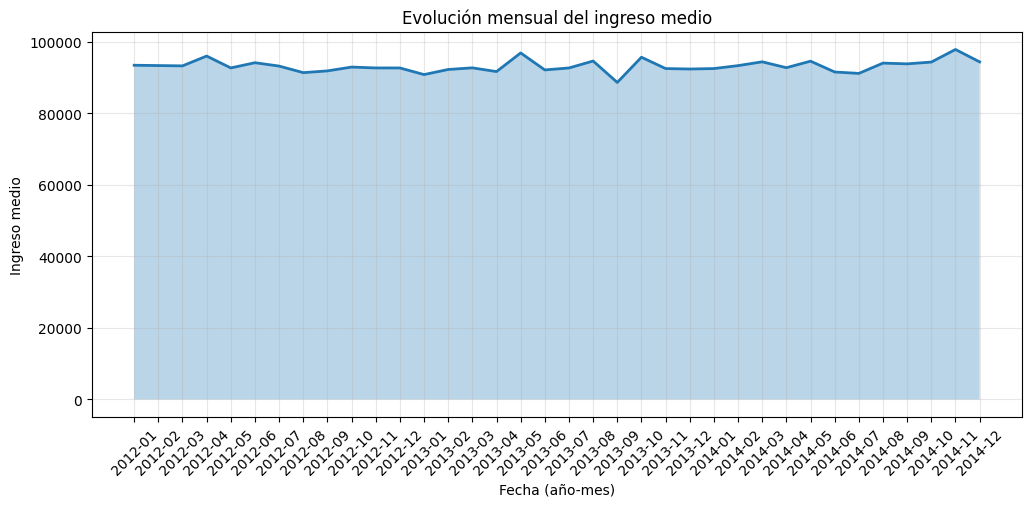

In [48]:
df_customers['YearMonth'] = df_customers['Dt_Customer'].dt.to_period('M').astype(str)
df_monthly_income = df_customers.groupby('YearMonth')['Income'].mean().reset_index()

plt.figure(figsize=(12, 5))
sns.lineplot(data=df_monthly_income, x='YearMonth', y='Income', linewidth=2)
plt.fill_between(df_monthly_income['YearMonth'], df_monthly_income['Income'], alpha=0.3)
plt.title('Evolución mensual del ingreso medio')
plt.xlabel('Fecha (año-mes)')
plt.ylabel('Ingreso medio')
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.show()


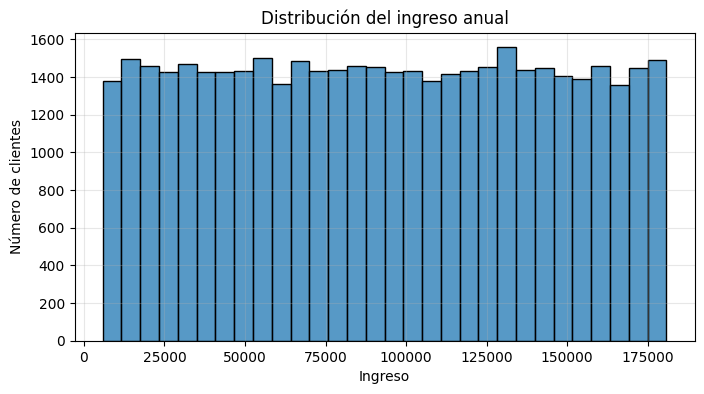

In [49]:
plt.figure(figsize=(8, 4))
sns.histplot(df_customers['Income'], bins=30)
plt.title('Distribución del ingreso anual')
plt.xlabel('Ingreso')
plt.ylabel('Número de clientes')
plt.grid(alpha=0.3)
plt.show()

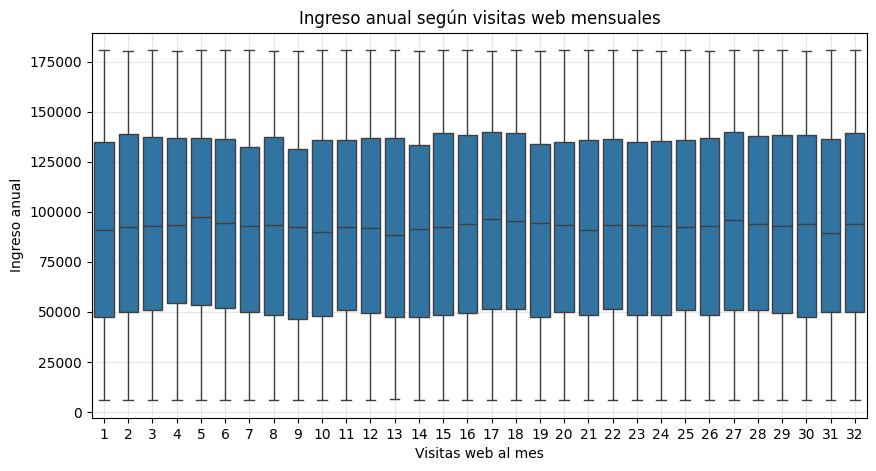

In [50]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_customers, x='NumWebVisitsMonth', y='Income')
plt.title('Ingreso anual según visitas web mensuales')
plt.xlabel('Visitas web al mes')
plt.ylabel('Ingreso anual')
plt.grid(alpha=0.3)
plt.show()

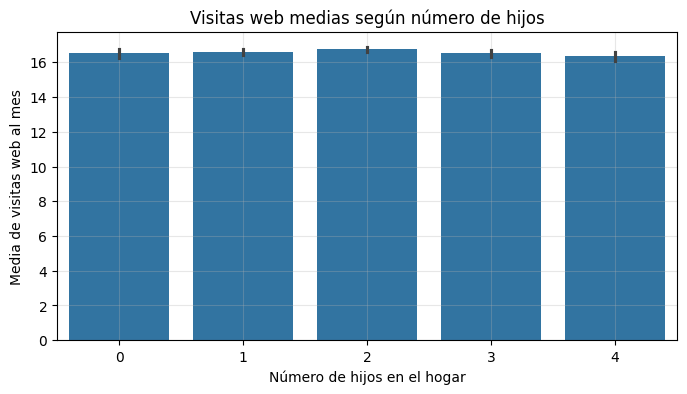

In [51]:
df_customers['TotalHijos'] = df_customers['Kidhome'] + df_customers['Teenhome']

plt.figure(figsize=(8, 4))
sns.barplot(data=df_customers, x='TotalHijos', y='NumWebVisitsMonth', estimator='mean')
plt.title('Visitas web medias según número de hijos')
plt.xlabel('Número de hijos en el hogar')
plt.ylabel('Media de visitas web al mes')
plt.grid(alpha=0.3)
plt.show()

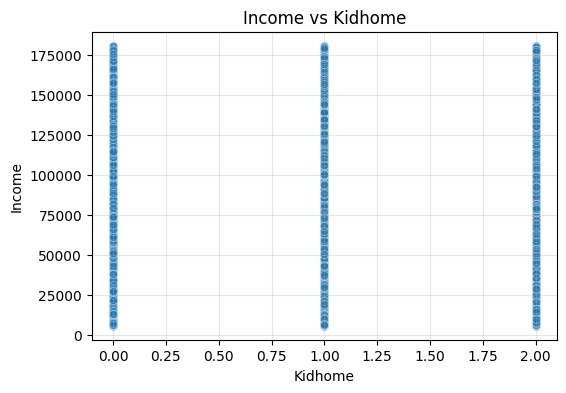

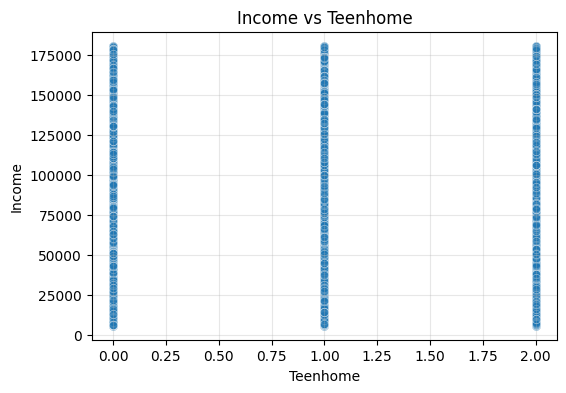

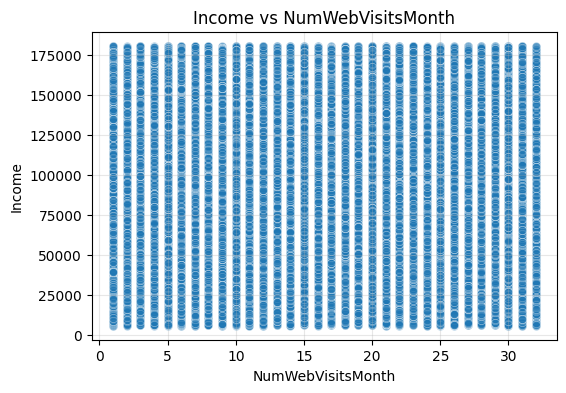

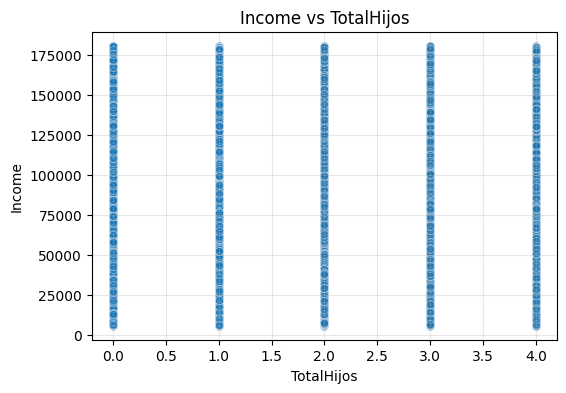

In [52]:
columna = 'Income'
num_cols = df_customers.select_dtypes(include='number').columns
num_cols = [col for col in num_cols if col != columna and col != 'Unnamed: 0']

for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=df_customers, x=col, y=columna, alpha=0.5)
    plt.title(f'{columna} vs {col}')
    plt.xlabel(col)
    plt.ylabel('Income')
    plt.grid(alpha=0.3)
    plt.show()


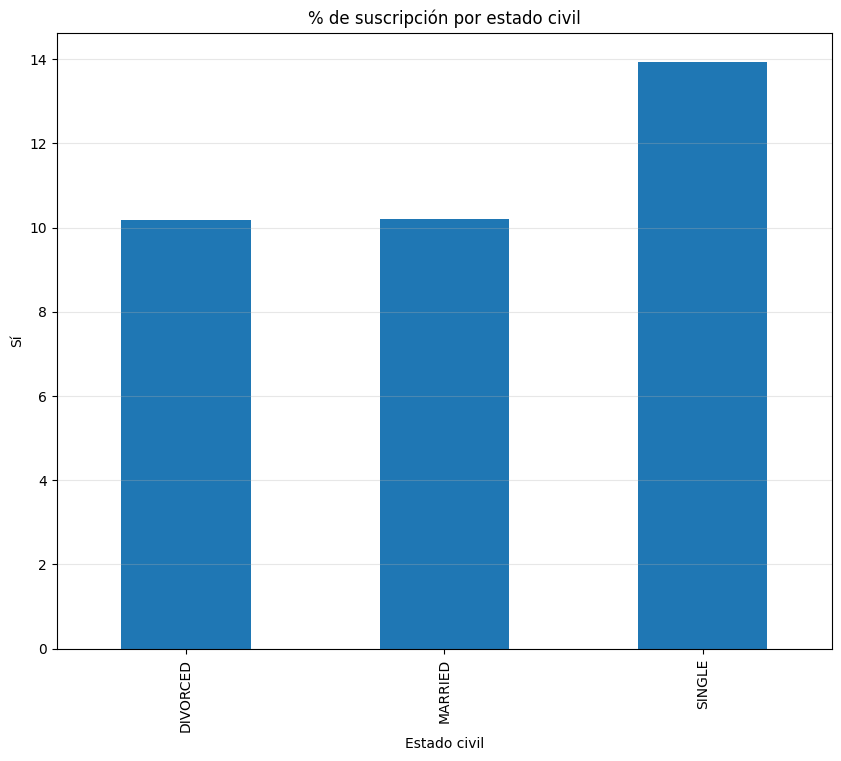

In [53]:
df_marital = df.groupby('marital')['y'].value_counts(normalize=True).unstack()
df_marital['Sí'] = df_marital.get('yes', 0) * 100

df_marital['Sí'].plot(kind='bar', figsize=(10, 8))
plt.title('% de suscripción por estado civil')
plt.ylabel('Sí')
plt.xlabel('Estado civil')
plt.grid(axis='y', alpha=0.3)
plt.show()

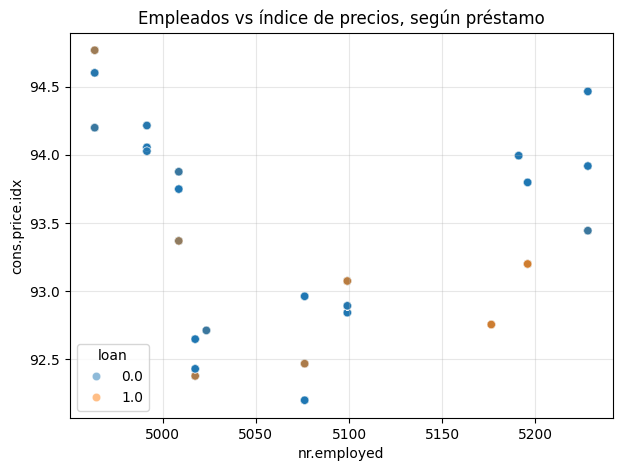

In [54]:
plt.figure(figsize=(7, 5))
sns.scatterplot(data=df, x='nr.employed', y='cons.price.idx', hue='loan', alpha=0.5)
plt.title('Empleados vs índice de precios, según préstamo')
plt.grid(alpha=0.3)
plt.show()

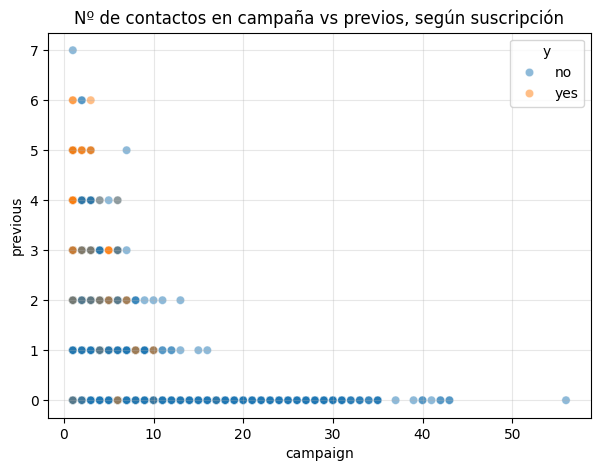

In [55]:
plt.figure(figsize=(7, 5))
sns.scatterplot(data=df, x='campaign', y='previous', hue='y', alpha=0.5)
plt.title('Nº de contactos en campaña vs previos, según suscripción')
plt.grid(alpha=0.3)
plt.show()

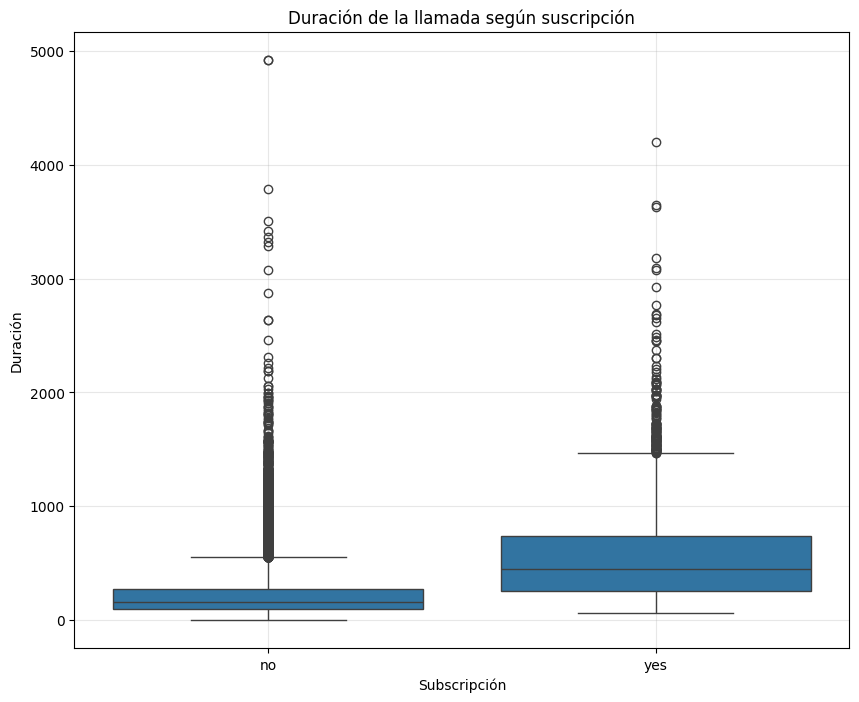

In [56]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=df, x='y', y='duration')
plt.title('Duración de la llamada según suscripción')
plt.xlabel('Subscripción')
plt.ylabel('Duración')
plt.grid(alpha=0.3)
plt.show()


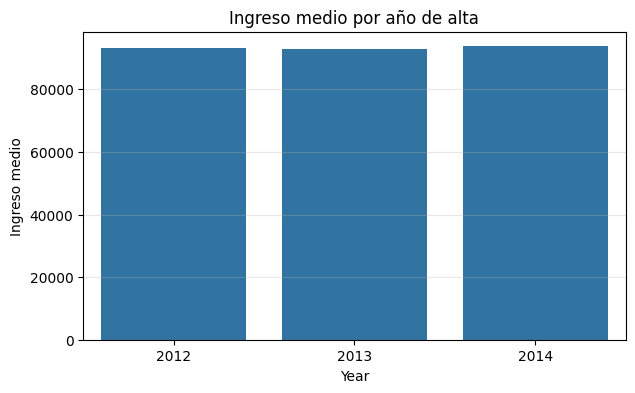

In [57]:
df_customers['Year'] = pd.to_datetime(df_customers['Dt_Customer']).dt.year
df_income_year = df_customers.groupby('Year')['Income'].mean().reset_index()

plt.figure(figsize=(7, 4))
sns.barplot(data=df_income_year, x='Year', y='Income')
plt.title('Ingreso medio por año de alta')
plt.ylabel('Ingreso medio')
plt.grid(axis='y', alpha=0.3)
plt.show()


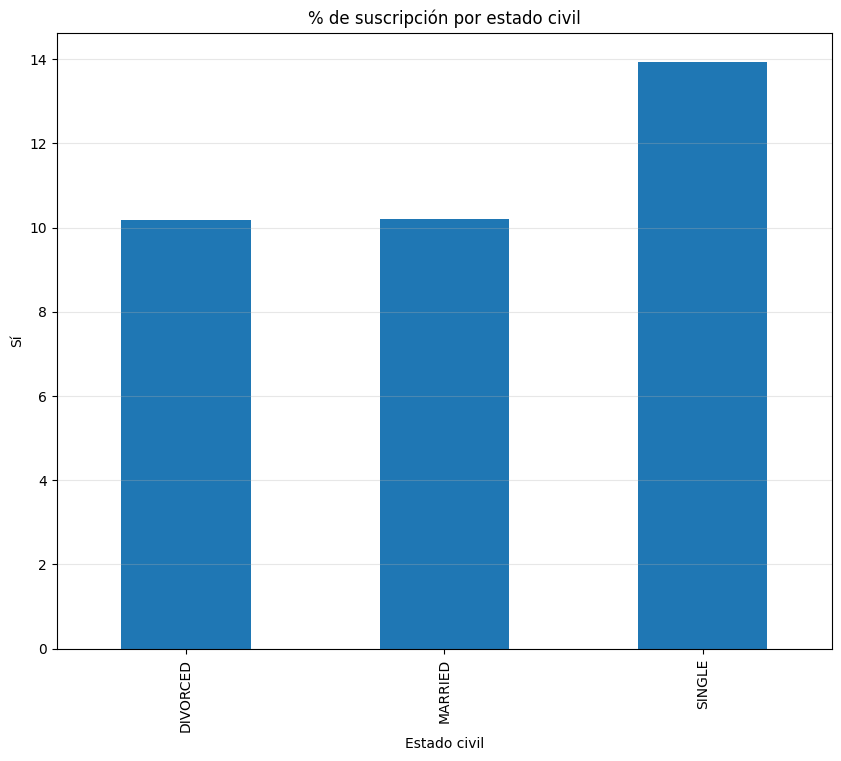

In [58]:
df_marital = df.groupby('marital')['y'].value_counts(normalize=True).unstack()
df_marital['Sí'] = df_marital.get('yes', 0) * 100

df_marital['Sí'].plot(kind='bar', figsize=(10, 8))
plt.title('% de suscripción por estado civil')
plt.ylabel('Sí')
plt.xlabel('Estado civil')
plt.grid(axis='y', alpha=0.3)
plt.show()

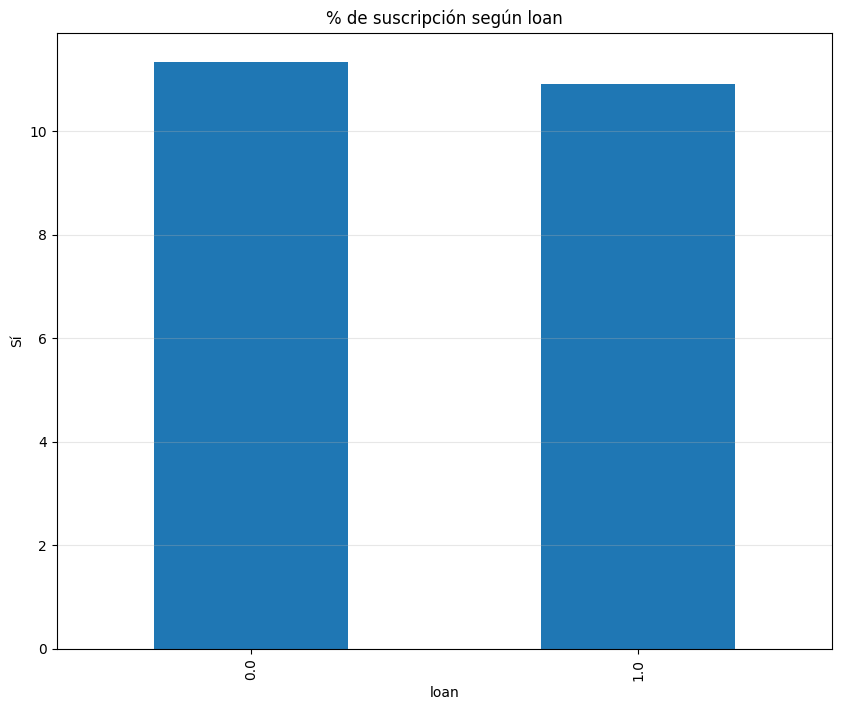

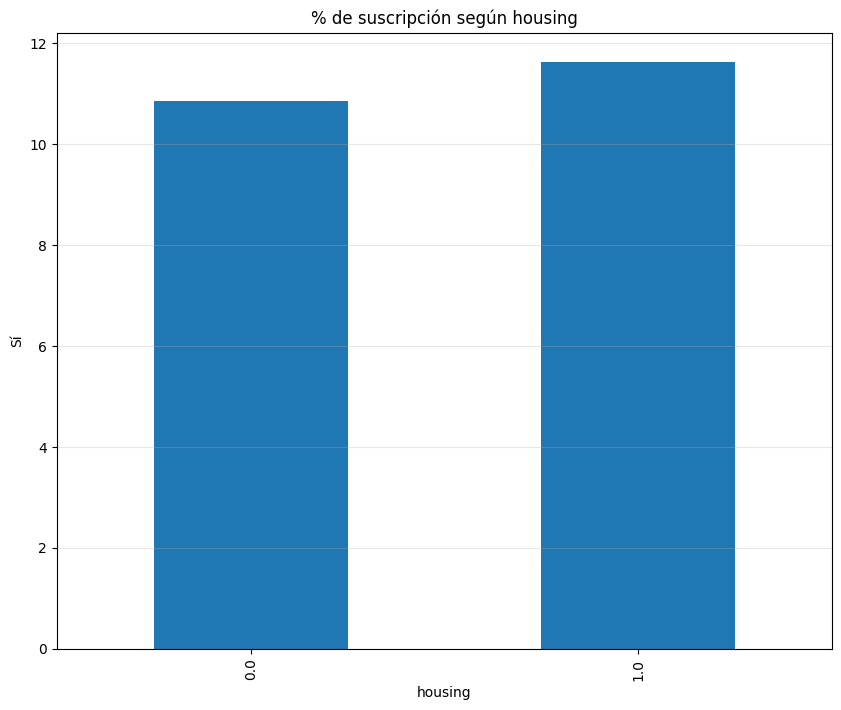

In [59]:
for col in ['loan', 'housing']:
    df_aux = df.groupby(col)['y'].value_counts(normalize=True).unstack()
    df_aux['Sí'] = df_aux.get('yes', 0) * 100

    df_aux['Sí'].plot(kind='bar', figsize=(10, 8))
    plt.title(f'% de suscripción según {col}')
    plt.ylabel('Sí')
    plt.xlabel(col)
    plt.grid(axis='y', alpha=0.3)
    plt.show()

## Conclusiones

- Los clientes con mayor duración de llamada tienen más posibilidad de subscribirse.
- La educación y estado civil son factores claros para la subscripción, al igual que housing y loan.
- Algunos meses la campaña es más efectiva que otros, al igual que la cantidad de contactos previos.
- La edad y el nivel economico no parecen afectar directamente por si solas en la subscripciones.
- Los hijos y las visitas online no marcan una tendencia clara en la aceptación.
- El canal de contacto también influye: ciertos métodos muestran mayor tasa de conversión.